In [1]:
import pandas as pd

In [3]:
files = {
    "uvm_trace": "./data/uvm-trace.csv",
    "nvbit_trace": "./data/nvbit-trace.csv",
    "uvm_tracking": "./data/uvm-tracking.csv",
    "uvm_tracking_total": "./data/uvm-tracking-total.csv",
    "uvm_tracking_total_with_corr_and_pf": "./data/uvm-tracking-with-corr-and-pf.csv",
}

In [5]:
def pre_process(ifile, ofile):
    import re
    with open(ifile, 'r') as f:
        lines = f.readlines()
        lines = [re.sub("\s+", ",", line.strip()) for line in lines]
        csv = "\n".join(lines)
        
    with open(ofile, 'w') as f:
        f.write(csv)

In [17]:
for file in files:
    ifile = files[file]
    ofile = ".".join(ifile.split(".")[:-1]) + "-pp." + ifile.split(".")[-1]
    print(ofile)
    pre_process(ifile, ofile)

./data/uvm-trace-pp.csv
./data/nvbit-trace-pp.csv
./data/uvm-tracking-pp.csv
./data/uvm-tracking-total-pp.csv
./data/uvm-tracking-with-corr-and-pf-pp.csv


In [23]:
uvm_trace_df = pd.read_csv("./data/uvm-trace-pp.csv")

In [24]:
uvm_trace_df

,cupti.uvm.migration.cause,cupti.uvm.kind,cupti.activity.kind,cupti.fault.addr,cupti.uvm.bytes,cupti.activity.start,cupti.activity.end,cupti.activity.duration
0,coherence,HtoD,uvm,200060800000,65536,1631547050770436778,1631547050770440202,3424
1,coherence,HtoD,uvm,200060810000,131072,1631547050770632362,1631547050770636522,4160
2,prefetch,HtoD,uvm,200060830000,65536,1631547050770636522,1631547050770639594,3072
3,coherence,HtoD,uvm,200060000000,65536,1631547050770762666,1631547050770765706,3040
4,coherence,HtoD,uvm,200060840000,65536,1631547050770807114,1631547050770810122,3008
...,...,...,...,...,...,...,...,...
428,prefetch,DtoH,uvm,200062650000,196608,1631547050890202186,1631547050890207434,5248
429,coherence,DtoH,uvm,200062680000,65536,1631547050902089162,1631547050902092362,3200
430,prefetch,DtoH,uvm,200062690000,458752,1631547050902092362,1631547050902101322,8960
431,coherence,DtoH,uvm,200062700000,65536,1631547050925733002,1631547050925736202,3200


In [29]:
uvm_trace_df.groupby(["cupti.uvm.kind", "cupti.uvm.migration.cause"]).count()

cupti.activity.kind  \
cupti.uvm.kind cupti.uvm.migration.cause                        
DtoH           coherence                                   17   
               prefetch                                     8   
HtoD           coherence                                  267   
               prefetch                                   141   

                                          cupti.fault.addr  cupti.uvm.bytes  \
cupti.uvm.kind cupti.uvm.migration.cause                                      
DtoH           coherence                                17               17   
               prefetch                                  8                8   
HtoD           coherence                               267              267   
               prefetch                                141              141   

                                          cupti.activity.start  \
cupti.uvm.kind cupti.uvm.migration.cause                         
DtoH           coherence                                    17   
               prefetch                                      8   
HtoD           coherence                                   267   
               prefetch                                    141   

                                          cupti.activity.end  \
cupti.uvm.kind cupti.uvm.migration.cause                       
DtoH           coherence                                  17   
               prefetch                                    8   
HtoD           coherence                                 267   
               prefetch                                  141   

                                          cupti.activity.duration  
cupti.uvm.kind cupti.uvm.migration.cause                           
DtoH           coherence                                       17  
               prefetch                                         8  
HtoD           coherence                                      267  
               prefetch                                       141

In [31]:
uvm_trace_df.sort_values(by="cupti.activity.duration", ascending=False)

,cupti.uvm.migration.cause,cupti.uvm.kind,cupti.activity.kind,cupti.fault.addr,cupti.uvm.bytes,cupti.activity.start,cupti.activity.end,cupti.activity.duration
422,prefetch,DtoH,uvm,200062510000,983040,1631547050830519146,1631547050830535562,16416
432,prefetch,DtoH,uvm,200062710000,851968,1631547050925736202,1631547050925750538,14336
14,prefetch,HtoD,uvm,200060950000,720896,1631547050771237098,1631547050771250090,12992
274,coherence,HtoD,uvm,200060ed0000,524288,1631547050777943210,1631547050777954666,11456
397,coherence,HtoD,uvm,200062030000,589824,1631547050779846346,1631547050779857642,11296
...,...,...,...,...,...,...,...,...
18,coherence,DtoH,uvm,2000609e0000,65536,1631547050771472746,1631547050771475690,2944
415,coherence,DtoH,uvm,200062420000,65536,1631547050788602570,1631547050788605482,2912
413,coherence,DtoH,uvm,200062400000,65536,1631547050782645578,1631547050782648458,2880
51,coherence,DtoH,uvm,2000609e0000,65536,1631547050772789578,1631547050772792234,2656


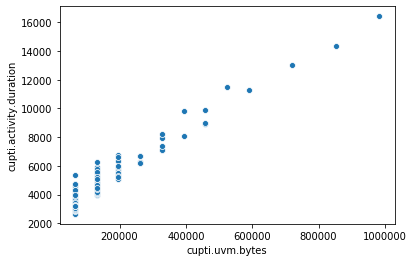

In [33]:
import seaborn as sns
sns.scatterplot(x="cupti.uvm.bytes", y="cupti.activity.duration", data=uvm_trace_df)

# Notes

- uvm-trace only records two kinds of events. Is it possible to record more events? e.g., `compute`, `eviction`
- cupti.activity.kind only has `uvm` events. Is it also possible to record events like `loop`, `function` and so on).
- Lot of nan's in the other traces. Having access to these informations can be more integral to the analysis supporting the labfee work. 
- Pagefaults are only being reported I believe, is it possible to get all kinds of events.

In [20]:
pd.read_csv("./data/nvbit-trace-pp.csv")

,event.begin#function,time.duration,mem.alloc,function,alloc.total_size,alloc.uid,alloc.address,event.begin#loop,loop,event.begin#iteration#bfs.loop,event.end#iteration#bfs.loop,region.count,time.inclusive.duration,iteration#bfs.loop,event.end#loop,event.end#function
0,BFSGraph,0.000261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.081253,h_graph_nodes,BFSGraph,8.000000e+06,1,200060000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000024,h_graph_mask,BFSGraph,1.000000e+06,2,200060800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000013,h_updating_graph_mask,BFSGraph,1.000000e+06,3,2000608f4400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000012,h_graph_visited,BFSGraph,1.000000e+06,4,200060a00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.201778,h_graph_edges,BFSGraph,2.399988e+07,5,200060c00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.404634,h_cost,BFSGraph,4.000000e+06,6,200062400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.006987,d_over,BFSGraph,1.000000e+00,7,2000609e8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000175,BFSGraph,bfs.loop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.000033,BFSGraph,bfs.loop,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pd.read_csv("./data/uvm-tracking-pp.csv")

,event.begin#function,cupti.starttime,time.duration,mem.alloc,function,alloc.total_size,alloc.uid,alloc.address,event.begin#loop,loop,...,cupti.uvm.access.type,cupti.uvm.pagefault.groups,cupti.sync,cupti.contextID,cupti.deviceID,event.end#iteration#bfs.loop,region.count,time.inclusive.duration,event.end#loop,event.end#function
0,BFSGraph,1.631549e+18,0.000621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1631549295976159119,1.570660e-01,h_graph_nodes,BFSGraph,8000000,1,200060000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1631549295976159119,2.600000e-05,h_graph_mask,BFSGraph,1000000,2,200060800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1631549295976159119,1.600000e-05,h_updating_graph_mask,BFSGraph,1000000,3,2000608f4400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1631549295976159119,1.600000e-05,h_graph_visited,BFSGraph,1000000,4,200060a00000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1631549295976159119,2.300000e-05,BFSGraph,bfs.loop,pagefaults.gpu,uvm,h_updating_graph_mask,2000609e0000,1.631549e+18,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,1631549295976159119,2.480000e-04,BFSGraph,bfs.loop,11,context,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,1631549295976159119,2.500000e-05,BFSGraph,bfs.loop,11,11,1,0.010782,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,1631549295976159119,1.580000e-04,BFSGraph,bfs.loop,1,0.190253,bfs.loop,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.read_csv("./data/uvm-tracking-total-pp.csv")

,event.begin#function,cupti.starttime,mem.alloc,function,alloc.total_size,alloc.uid,alloc.address,cupti.uvm.migration.cause,cupti.uvm.kind,cupti.activity.kind,alloc.label#cupti.fault.addr,cupti.fault.addr,cupti.uvm.bytes,cupti.activity.start,cupti.activity.end,cupti.activity.duration,alloc.uid#cupti.fault.addr,alloc.index#cupti.fault.addr,event.end#function,region.count
0,BFSGraph,1631550047296958104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1631550047296958104,h_graph_nodes,BFSGraph,8000000,1,200060000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1631550047296958104,h_graph_mask,BFSGraph,1000000,2,200060800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1631550047296958104,h_updating_graph_mask,BFSGraph,1000000,3,2000608f4400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1631550047296958104,h_graph_visited,BFSGraph,1000000,4,200060a00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1631550047296958104,BFSGraph,coherence,DtoH,uvm,h_cost,200062680000,65536.0,1.631550e+18,1.631550e+18,3168.0,6.0,2621440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,1631550047296958104,BFSGraph,prefetch,DtoH,uvm,h_cost,200062690000,458752.0,1.631550e+18,1.631550e+18,9120.0,6.0,2686976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,1631550047296958104,BFSGraph,coherence,DtoH,uvm,h_cost,200062700000,65536.0,1.631550e+18,1.631550e+18,3232.0,6.0,3145728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,1631550047296958104,BFSGraph,prefetch,DtoH,uvm,h_cost,200062710000,851968.0,1.631550e+18,1.631550e+18,14560.0,6.0,3211264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
